# **Topik 7 8**

---



Silakan lakukan pembuatan syntax code python Exploratory Data Analysis untuk masalah sebagai berikut :

*   Pembuatan barplot (horizontal dan vertikal)
*   Pembuatan distplot
*   Pembuatan boxplot
*   Pembuatan scatterplot
*   Pembuatan pie chart

anda bebas menggunakan library apa aja seperti matplotlib, seaborn, bokeh, dsb.

untuk variabel-variabel yang ada pada dataset tsb, dapat dibagi dahulu menjadi (1) variabel numerical dan (2) variabel categorical

jangan lupa juga tentukan mana yang menjadi target variable dari permasalahan machine learning tersebut.

##**Library & DataFrame**

In [155]:
#import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [156]:
#melakukan import dataframe menggunakan link spreadsheet

url = f'https://docs.google.com/spreadsheets/d/e/2PACX-1vTXKvVFruYbAlEYqN-H41SEvtIJdaP4nYiwR2RvFfZJdc4ufEsjGEIsortvmaLMu7sRKvHS9ipo9-no/pub?gid=1856217029&single=true&output=csv'
df = pd.read_csv(url)

In [157]:
#menampilkan 5 data teratas menggunakan fungsi head(5)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##**Data Cleansing**

In [158]:
#melihat info dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [159]:
#mengubah dan menampilkan nilai dataframe kolom Survived
#nilai 1 menjadi survive
#nilai 0 menjadi not survive

df['Survived'] = df['Survived'].replace({1:'survived', 0:'not survived'})
df[['PassengerId','Survived']]

,PassengerId,Survived
0,1,not survived
1,2,survived
2,3,survived
3,4,survived
4,5,not survived
...,...,...
886,887,not survived
887,888,survived
888,889,not survived
889,890,survived


In [160]:
#mengubah dan menampilkan nilai dataframe kolom Embarked
#nilai C menjadi Cherbourgh
#nilai S menjadi Southampton
#nilai Q menjadi Queenstown

df['Embarked'] = df['Embarked'].replace({'C':'Cherbourgh', 'S':'Southampton', 'Q':'Queenstown'})
df[['PassengerId','Embarked']]

,PassengerId,Embarked
0,1,Southampton
1,2,Cherbourgh
2,3,Southampton
3,4,Southampton
4,5,Southampton
...,...,...
886,887,Southampton
887,888,Southampton
888,889,Southampton
889,890,Cherbourgh


In [161]:
#menampilkan kolom pada dataframe yang merupakan nilai numerical
#select_dtypes() fungsi untuk memilih kolom berdasarkan tipe data

df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,NaN,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [162]:
#menampilkan kolom pada dataframe yang merupakan nilai categorical
#select_dtypes() fungsi untuk memilih kolom berdasarkan tipe data

df_categ = df.select_dtypes(include = ['object'])
df_categ

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,not survived,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,Southampton
1,survived,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,Cherbourgh
2,survived,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,Southampton
3,survived,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,Southampton
4,not survived,"Allen, Mr. William Henry",male,373450,NaN,Southampton
...,...,...,...,...,...,...
886,not survived,"Montvila, Rev. Juozas",male,211536,NaN,Southampton
887,survived,"Graham, Miss. Margaret Edith",female,112053,B42,Southampton
888,not survived,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,Southampton
889,survived,"Behr, Mr. Karl Howell",male,111369,C148,Cherbourgh


In [163]:
#mengecek apakah terdapat nilai null pada dataframe
#isna() untuk menghasilkan boolean untuk mengecek apakah dataframe memiliki nilai null

df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [164]:
#menampilkan jumlah nilai null pada kolom
#sum() untuk menjumlahkan banyak baris yang memiliki nilai null

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Terdapat kolom yang memiliki baris bernilai null, diantaranya adalah



*   Age (177 baris)
*   Cabin (687 baris)
*   Embarked (2 baris)





In [165]:
#mengisi nilai null pada kolom Age dengan nilai median pada kolom
#median() untuk mendapatkan nilai median kolom
#fillna() untuk mengisi nilai null

df['Age'] = df['Age'].fillna(df['Age'].median())
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [166]:
#menampilkan kolom Cabin

df_cabin = df['Cabin']
df_cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [167]:
#menghapus nilai null pada kolom Cabin
#dropna() untuk menghapus nilai null pada kolom

df.drop('Cabin', axis = 1, inplace = True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [168]:
#menampilkan pengelompokkan pada kolom Embarked dan mencari modus

df_embark = df.groupby('Embarked')['PassengerId'].count()
df_embark

Embarked
Cherbourgh     168
Queenstown      77
Southampton    644
Name: PassengerId, dtype: int64

In [169]:
#mengisi nilai null pada kolom Embarked dengan nilai modusnya
#mode() untuk mencari nilai modus pada kolom
#[0] untuk mengambil nilai modus pertama pada pencarian mode()

df_emmod = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(df_emmod)

In [170]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##**Visualisasi**

### **Barplot**

Fungsi barplot sangat berguna untuk memberikan visualisasi yang jelas dan intuitif dalam menganalisis data kategorikal, seperti perbandingan antara kategori atau distribusi data dalam bentuk batang yang mudah dipahami.

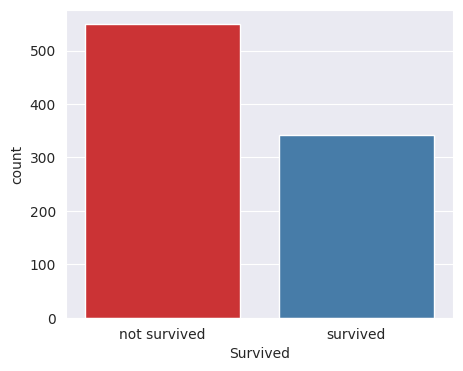

In [171]:
#menampilkan barplot untuk Survived
#set_style() untuk mengatur gaya tampilan
#figure() untuk mengatur ukuran dari plot
#countplot() untuk membuat countplot (chart batang) 
#show() untuk menampilkan plot 

sns.set_style("darkgrid")
plt.figure(figsize = (5,4))
sns.countplot(x = 'Survived', data = df, palette = 'Set1')
plt.show()

In [172]:
#menampilkan total jumlah penumpang yang selamat

df.groupby("Survived")[['PassengerId']].count()

,PassengerId
Survived,
not survived,549
survived,342


**Insight :**

Dari data diatas dapat disimpulkan bahwa jumlah penumpang yang not survived lebih banyak dibandingkan dengan penumpang yang survived

<Axes: xlabel='count', ylabel='Embarked'>

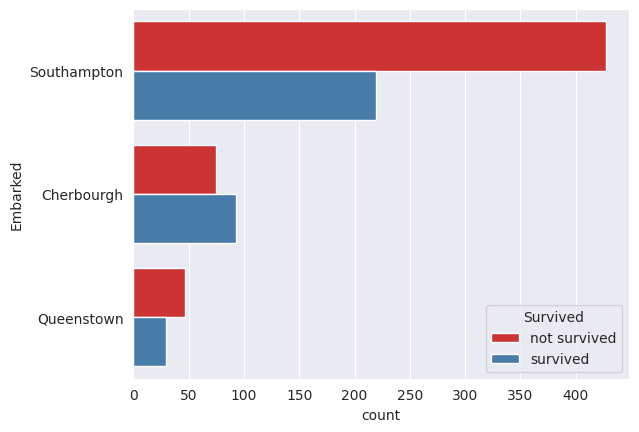

In [173]:
sns.countplot(y ='Embarked' , hue = 'Survived', data = df, palette = 'Set1')

**Insight :**

Dari bar plot diatas dapat disimpulkan bahwa penumpang not survived dan survived terbanyak berasal dari Southampton

###**Distplot**

Fungsi untuk membuat histogram dan distribusi plot pada data numerik dalam bentuk grafik garis. Berguna untuk menampilkan distribusi data dan melihat pola atau kecenderungan dalam data.

In [174]:
#menampilkan kolom Age

df_age = df['Age']
df_age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [175]:
#mengubah tipe data pada kolom Age menjadi integer
#astype() untuk mengubah tipe data

df_age['Age'] = df['Age'].astype(int)

In [176]:
#menampilkan kolom age dengan nilai teratas
#head() untuk menampilkan nilai teratas

df_age['Age'].head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

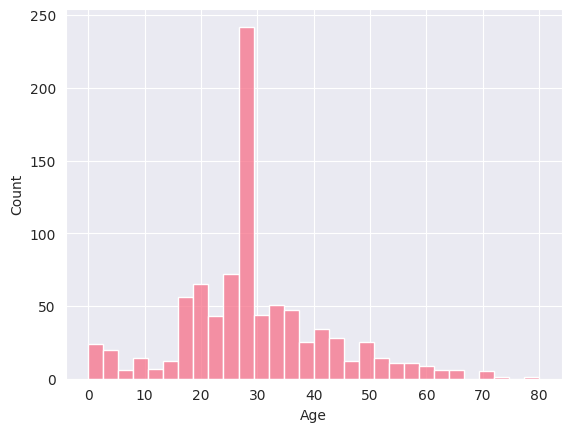

In [177]:
#menampilkan histogram plot dari Age
#set_palette() untuk memberikan palette tema color
#bins untuk menentukan jumlahh interval
#histplot() untuk membuat histogram menggunakan Seaborn

sns.set_palette("husl")
sns.histplot(x = 'Age', data = df_age, bins = 30)

<Axes: xlabel='Age', ylabel='Density'>

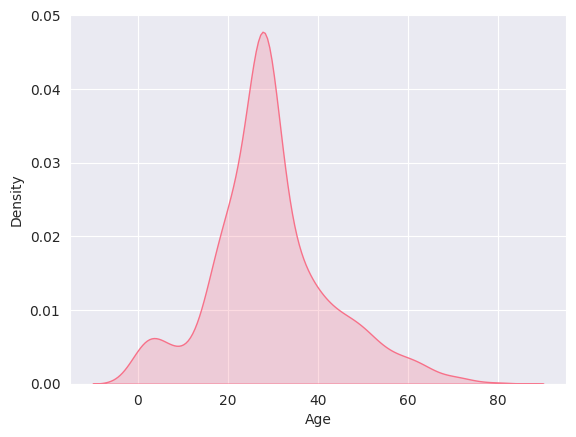

In [178]:
#menampilkan plot densitas kernel
#kdeplot() untuk membuat plot densitas kernel
#shade = True untuk memberikan bayangan

sns.kdeplot(x = 'Age', data = df_age, shade = True)

**Insight :**

Dari histogram dan densitas plot diatas, dapat disimpulkan bahwa penumpang terbanyak adalah berumur 20 ke 30 tahun

###**Boxplot**

Fungsi untuk membuat box plot atau diagram kotak yang menampilkan ringkasan statistik dari data numerik, seperti kuartil, median, serta data outliers. Berguna untuk melihat distribusi dan variabilitas data secara grafis.

<Axes: ylabel='Age'>

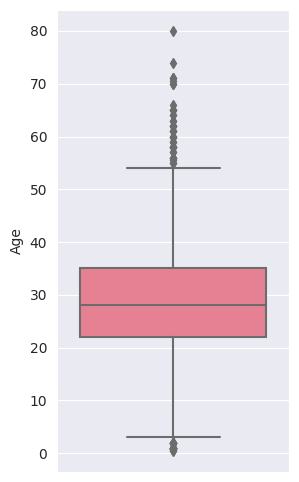

In [179]:
#menampilkan boxplot untuk kolom Age
#figure() untuk membuat figure dengan parameter figsize
#boxplot() untuk membuat box plot dengan seaborn
#orient='v' untuk menentukan orientasi box plot sebagai vertical

plt.figure(figsize = (3,6))
sns.boxplot(y = 'Age', data = df, orient = 'v')

**Insight :**

Dari boxplot yang telah dibuat, dapat terlihat ringkasan statistik dari umur para penumpang

In [180]:
#mengelompokkan umur ke empat kategori
#yaitu Child, Teen, Adult, Old
#cut() untuk membagi nilai dalam kolom Age
#bins untuk menentukan batasan-batasan umur
#labels untuk menentukan label dari batasan

bins = [0, 12, 18, 49, 100]
labels = ['Child','Teen','Adult','Old',]
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [181]:
#menampilkan jumlah dari setiap kategori dari Age
#groupby() untuk mengelompokkan baris

df_Age = df.groupby('Age_group')['PassengerId'].count()
df_Age

Age_group
Child     69
Teen      70
Adult    678
Old       74
Name: PassengerId, dtype: int64

<Axes: xlabel='Age_group', ylabel='Age'>

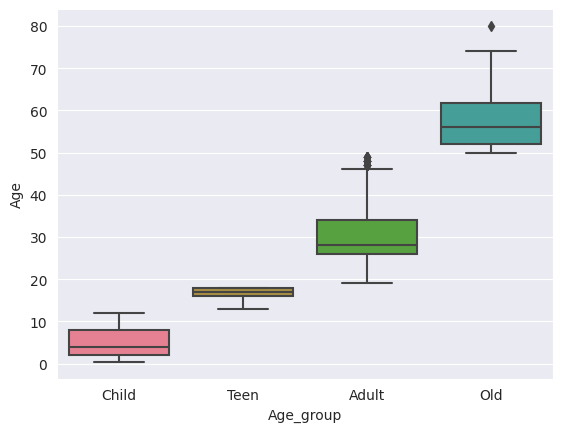

In [182]:
#menampilkan boxplot dari Age berdasarkan Age group yang telah dibuat
#boxplot() untuk membuat boxplot

sns.boxplot(y = 'Age', x = 'Age_group', data = df)

**Insight :**

Dari boxplot yang telah dibuat, dapat terlihat ringkasan statistik dari umur para penumpang berdasarkan pengelompokkan yang telah dibuat pada Age_group

###**Scatterplot**

Fungsi untuk membuat scatter plot atau diagram titik yang menampilkan hubungan antara dua variabel numerik. Berguna untuk melihat pola atau hubungan antara dua variabel serta mengidentifikasi pencilan (outliers) dalam data.

In [183]:
#menampilkan data dengan head(5)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,not survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton,Adult
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourgh,Adult
2,3,survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,Adult
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton,Adult
4,5,not survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton,Adult


<Axes: xlabel='Age', ylabel='Fare'>

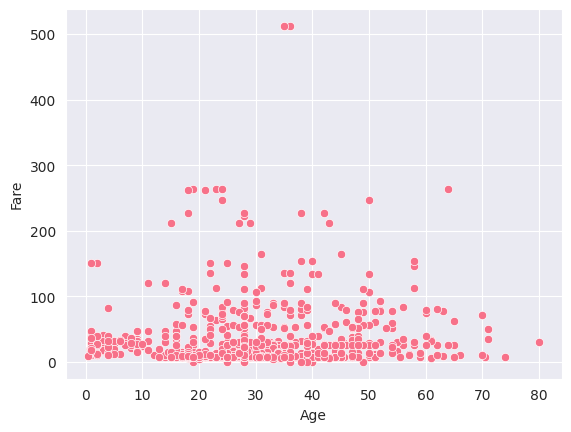

In [184]:
#menampilkan scatterplot untuk Age dan Fare
#scatterplot() untuk membuat scatterplot dua kolom

sns.scatterplot(x = 'Age', y = 'Fare', data = df)

In [185]:
#menampilkan korelasi antara Fare dengan Age
#corr() untuk menghitung koefisien korelasi antara dua kolom
#Nilai koefisien korelasi:
#-1 (korelasi negatif sempurna)
#1 (korelasi positif sempurna)
#0 menunjukkan tidak adanya hubungan linear antara dua variabel

df[['Age','Fare']].corr()

,Age,Fare
Age,1.000000,0.096688
Fare,0.096688,1.000000


**Insight :**

Dari korelasi yang telah dibuat, dapat disimpulkan bahwa kolom Age dan Fare memiliki hubungan linear yang tidak kuat dikarenakan kurang dari 1

###**Pie Chart**

Fungsi untuk membuat pie chart atau diagram lingkaran yang menampilkan proporsi atau persentase dari kategori atau nilai dalam data. Berguna untuk menggambarkan perbandingan antara kategori atau nilai dalam suatu data dalam bentuk persentase.

In [186]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,not survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton,Adult
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourgh,Adult
2,3,survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,Adult
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton,Adult
4,5,not survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton,Adult


In [187]:
#menghitung jumlah penumpang Survived
#len() untuk menghitung panjang atau jumlah baris

survived_count = len(df[df['Survived'] == 'survived'])
not_survived_count = len(df[df['Survived'] == 'not survived'])

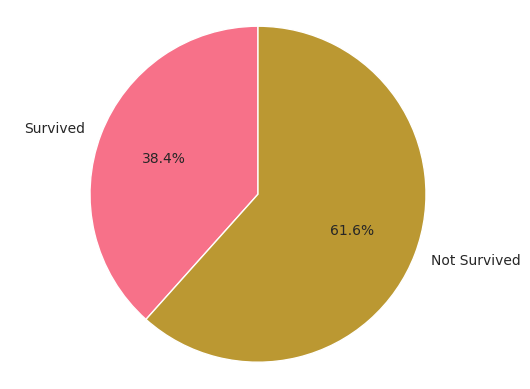

In [190]:
#membuat pie chart
#labels untuk menentukan bagian yang akan ditampilkan pada pie chart
#sizes untuk membagi proporsi masing masing label
#fig1 sebagai objek figure
#ax1 sebagai objek axes
#autopct untuk menampilkan persentase nilai 
#ax1.axis('equal') untuk engatur axis pada diagram pie agar menjadi lingkaran 

labels = ['Survived', 'Not Survived']
sizes = [survived_count, not_survived_count]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

#menampilkan pie chart
plt.show()

**Insight :**

Dari pie chart yang telah dibuat, dapat disimpulkan bahwa not survived memiliki bagian yaitu 61.6% dan survived memiliki bagian 38.4%